## GSC Buan-675-A

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from mip import Model, INTEGER, BINARY, maximize, minimize, xsum

## Data Frame

In [2]:
df1 = pd.read_csv("baun675_hw2_data.csv")  
print(df1)

             x          y  population name
0  -125.054795  13.703696       42760    A
1    41.839656 -59.181868        7950    B
2    20.940089   5.932856       21905    C
3   -88.803093  -3.120039       36835    D
4    59.086009  -5.155562       38640    E
5  -162.169694   8.157550       30760    F
6    60.158522 -91.886845       41455    G
7  -108.072094 -41.994506       50915    H
8    17.724978  32.886515       23235    I
9   -23.892725 -79.493783       33540    J
10  -30.999653  15.342608       53150    K
11  135.996903  23.266191        8040    L
12   51.904766  32.616293       53585    M
13   21.965280  67.237630        9045    N
14  -50.887413 -40.731170       15400    O


In [4]:
city = pd.read_csv('baun675_hw2_data.csv')

In [5]:
D = []
for _, row in city.iterrows():
    dx = row['x'] - city['x']
    dy = row['y'] - city['y']
    d = (dx**2 + dy**2)**0.5
    D.append(d.values)
D = np.array(D)

In [6]:
ncity = len(city)



In [7]:
V = set(range(ncity))

In [8]:
pop = city['population']

In [9]:
# QT Warehouses 

nw = 3
nw1 = 1
nw2 = 2

## Model

In [10]:
m = Model('Two Warehouse Model')

## Dec. Variables 

In [11]:
y = [[m.add_var(var_type= BINARY) for i in V] for j in V]

## Objective 

In [12]:
m.objective = \
minimize(xsum([xsum(
    [y[i][j] * D[i][j] * pop[j] for i in V]) for j in V]))

## Constraints

In [13]:
for j in V: 
    m += xsum([y[i][j] for i in V])==1

In [14]:
m += xsum([y[i][i] for i in V]) == nw #nw1 #nw2

In [15]:
for i in V: 
    for j in V: 
        if i != j: 
            m += y[i][j] <= y[i][i]

## Optimize

In [16]:
m.optimize()

<OptimizationStatus.OPTIMAL: 0>

In [17]:
warehouses = [i for i in V if y[i][i].x == 1.0]

In [18]:
city.iloc[warehouses]

,x,y,population,name
3,-88.803093,-3.120039,36835,D
6,60.158522,-91.886845,41455,G
12,51.904766,32.616293,53585,M


NameError: name 'v' is not defined

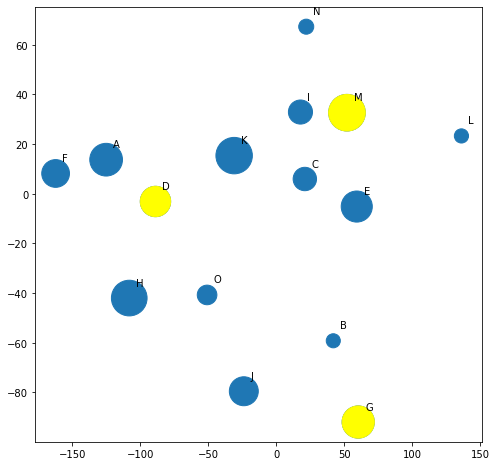

In [19]:
fig, ax = plt.subplots(figsize=(8,8))


plt.scatter(city['x'], city['y'], s = city['population']//40)
plt.scatter(city.iloc[warehouses]['x'], 
           city.iloc[warehouses]['y'], color = 'Yellow', s = city.iloc[warehouses]['population']//40)


for i in range(ncity):
    ax.annotate(
    city.iloc[i]['name'], 
    city.iloc[i][['x', 'y']].values +5)

for wh in warehouses: 
    dest = [j for j in v-{wh} if y[wh][j].x == 1]
    xi, yi = city.iloc[wh][['x', 'y']]
    for j, row in city.iterrows(): 
        if j in dest: 
            xj, yj = city.iloc[j][['x', 'y']]
            dx = xj - xi 
            dy = yj - yi
            plt.arrow(xi, yi, dx, dy, head_width=5)

In [147]:
m.objective_value

17665952.532568015

In [148]:
m.objective_value/city['population'].sum()

37.8111844280856

## Comparing COG 

In [198]:
num = (city['population'] * city['x']).sum()
den = city['population'].sum()
x = num/den


-26.301327142879813


In [202]:
num = (city['population'] * city['y']).sum()
den = city['population'].sum()
y = num/den



print( 'COG:',  x , y)

COG: -26.301327142879813 -10.564798745078917


## Average Distance

In [164]:
for i, row in city.iterrows(): 
    x = row['x']
    y = row['y']
    d = np.sqrt((city['x']-x)**2 + (city['y'] - y)**2) 
    D = (d* city['population']).sum()
    avg_dist = [{'name': 'Av Dist', 'avg': D / city['population'].sum()}]
    
pd.DataFrame(avg_dist).sort_values(by = 'avg')


,name,avg
0,Av Dist,88.465324


## Change in the quantity of WH. 

Results with 1 warehouse: 

 	-30.999653 	15.342608 	53150 	K

Results with 2 warehouse: 

 	-88.803093 	-3.120039 	36835 	D
 	59.086009 	-5.155562 	38640 	E

While the Optimization, COG, and AvDist allow us to see the best geographical benefit to a warehouse location, the missing objective of profit and risk are neglected in these findings. Profit and risk should be also be taken in to consideration when determining the best location for a warhouse. 